# Step 0: Understand problem statement
## Here we are to find a business problem and come up with a solution for a retail shop

# Step 1: Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("SampleSuperstore.csv")

# Step 2: Data inspection

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
df.shape

(9994, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data inspection done

# Step 3: i.) Cleaning the data  
## check whether there is null values present in the data

In [10]:
null_values=df.columns.isnull().sum()
null_values

0

# There are no null values in the dataset,hence we can proceed with the analysis

# ii.) Check if there are any outliers present in the given dataset
## applicable for continuous variables

In [11]:
df.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


<Axes: >

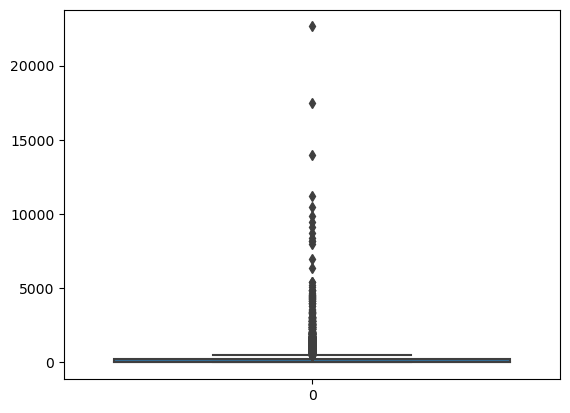

In [12]:
sns.boxplot(df["Sales"])

Implies,
1. There are outliers in the sales data which is because of some customers purchasing more items.
2. There are many of them who have purchased many items.Hence we should conserve the outliers as well for further analysis.
3. 11.67% of the customers are having the sales rate high in the entire dataset

In [13]:
df["Sales"].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [14]:
Q1_sales=df["Sales"].quantile(0.25)
Q3_sales=df["Sales"].quantile(0.75)
IQR_sales=Q3_sales-Q1_sales

In [15]:
Q1_sales

17.28

In [16]:
Q3_sales

209.94

In [17]:
IQR_sales

192.66

In [18]:
#Lower range of box plot

In [19]:
lower_sales=Q1_sales-1.5*(IQR_sales)
lower_sales

-271.71000000000004

In [20]:
#upper range of the  boxplot

In [21]:
upper_sales=Q3_sales+1.5*(IQR_sales)
upper_sales

498.93

We can see that 498.93 is the upper range,let's see how many of the customers have purchased above the boxplot and they are the outliers 

In [22]:
df[df["Sales"]>=498.93]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
11,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9942,Standard Class,Consumer,United States,Anaheim,California,92804,West,Office Supplies,Storage,998.8200,9,0.00,29.9646
9947,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Furniture,Chairs,1925.8800,6,0.00,539.2464
9948,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Office Supplies,Appliances,2405.2000,8,0.00,793.7160


Out of 9994 customers we have many customers doing more sales above the upper range 498.93 i.e., 1167 customers.

In [23]:
100*(1167/9994)

11.677006203722232

# 11.67% of the customers are having the sales rate high in the entire dataset

# Let's examine one more column-"Quantity"
## detect outliers,so that we can know how many customers have purchased in more quantity

<Axes: >

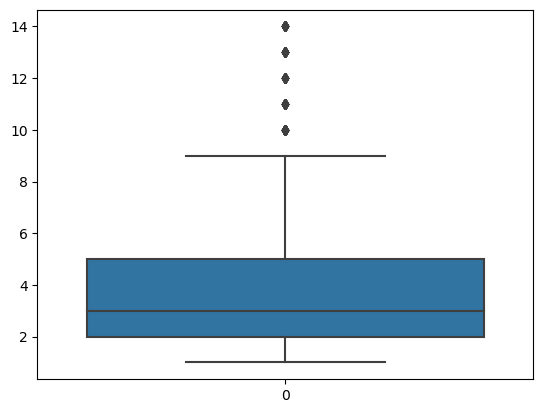

In [24]:
sns.boxplot(df["Quantity"])

1. Maximum Quantities of products purchased are in between 2(minimum) and 5(maximum)
2. 5 outliers are seen who have purchased products in quantities of 10,11,12,13,14 respectively
3. 

In [25]:
df["Quantity"].describe()

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [26]:
Q1_quan=df["Quantity"].quantile(0.25)

In [27]:
Q1_quan

2.0

In [28]:
Q3_quan=df["Quantity"].quantile(0.75)

In [30]:
Q3_quan

5.0

In [32]:
IQR_quan=Q3_quan-Q1_quan

In [33]:
IQR_quan

3.0

In [34]:
Lower_range_quan=Q1_quan-1.5*(IQR_quan)

In [35]:
Upper_range_quan=Q3_quan+1.5*(IQR_quan)

In [36]:
Lower_range_quan

-2.5

In [37]:
Upper_range_quan

9.5

In [38]:
#who have purchased products in quantities of 10,11,12,13,14 respectively from quantity 
df[df["Quantity"]>=9]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.184,9,0.2,85.3092
37,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Office Supplies,Envelopes,113.328,9,0.2,35.4150
113,Second Class,Consumer,United States,Columbus,Ohio,43229,East,Office Supplies,Fasteners,40.096,14,0.2,14.5348
122,First Class,Consumer,United States,Wilmington,Delaware,19805,East,Office Supplies,Envelopes,115.020,9,0.0,51.7590
132,First Class,Corporate,United States,Columbus,Ohio,43229,East,Office Supplies,Fasteners,21.456,9,0.2,6.9732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,Standard Class,Consumer,United States,Chicago,Illinois,60623,Central,Technology,Accessories,153.824,11,0.2,38.4560
9941,Standard Class,Consumer,United States,San Francisco,California,94122,West,Technology,Accessories,223.580,14,0.0,87.1962
9942,Standard Class,Consumer,United States,Anaheim,California,92804,West,Office Supplies,Storage,998.820,9,0.0,29.9646
9979,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,437.472,14,0.2,153.1152


In [39]:
#who have purchased products in quantities of 10,11,12,13,14 respectively from quantity 
428/9994*100

4.282569541725035

# upto 4.28% of customers have purchased products in quantity of 9 or more

In [40]:
df["Discount"].mean()

0.15620272163297977

<Axes: >

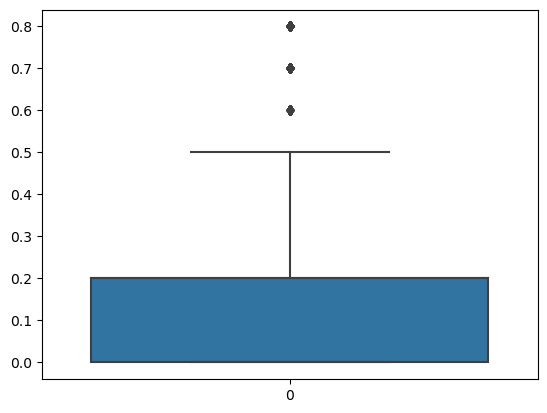

In [41]:
sns.boxplot(df["Discount"])

1.The discount for majority of customers lie in the range of 0%-20% 
2.In rare cases the discounts are 60,70 and 80 percents respectively.
3.More than 50% of the customers have got the discount more than 20%.=>  the discount could be minimized to get even more profit
4.9% of total customers have received discount more than 50%

In [43]:
df[df["Discount"]>=0.2]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,13.3760,4,0.20,4.6816
9979,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,437.4720,14,0.20,153.1152
9981,First Class,Consumer,United States,Fairfield,Ohio,45014,East,Office Supplies,Labels,16.5200,5,0.20,5.3690
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028


In [44]:
#The customers who have got discount >= 20% is :
5050/9994*100

50.53031819091455

# More than 50% of the customers have got the discount more than 20%

In [45]:
df[df["Discount"]>=0.5]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,9.618,2,0.7,-7.0532
32,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,6.858,6,0.7,-5.7150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9870,First Class,Corporate,United States,Mason,Ohio,45040,East,Office Supplies,Binders,22.428,3,0.7,-17.9424
9877,First Class,Home Office,United States,Cleveland,Ohio,44105,East,Office Supplies,Binders,8.700,5,0.7,-6.3800
9903,Standard Class,Consumer,United States,Carrollton,Texas,75007,Central,Furniture,Furnishings,25.128,3,0.6,-6.9102
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.386,7,0.8,-35.8176


In [46]:
#customers who received 50%or more discount are:
922/9994  *100  

9.225535321192716

# 9% of total customers have received discount more than 50%

# now let's move on to the last variable "Profit"

<Axes: >

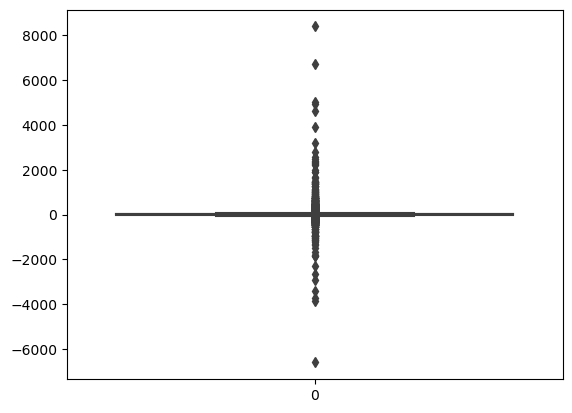

In [47]:
sns.boxplot(df["Profit"])

1.Maximum values of profit appear in between 1.72 and 27.64
2.There are somany outliers present
3.Upto 12.7% of the customers helps making more  profit for retail store
4.Therefore, there'\n's upto $1.923lakhs total profit for the retail store

In [51]:
#finding statistical parameters of a bix plot
Q1_prof=df["Profit"].quantile(0.25)
Q3_prof=df["Profit"].quantile(0.75)
IQR_prof=Q3_prof-Q1_prof
IQR_prof

27.63525

In [52]:
Q1_prof

1.72875

In [53]:
Q3_prof

29.364

In [54]:
#upper and lower range
upper_prof=Q3_prof+1.5*(IQR_prof)
lower_prof=Q1_prof-1.5*(IQR_prof)

In [55]:
upper_prof

70.816875

In [56]:
lower_prof

-39.724125

outliers in profit

In [57]:
df[df["Profit"]>=upper_prof].sum()


Ship Mode       Second ClassStandard ClassStandard ClassStanda...
Segment         ConsumerConsumerConsumerConsumerConsumerCorpor...
Country         United StatesUnited StatesUnited StatesUnited ...
City            HendersonLos AngelesLos AngelesSeattleOremRich...
State           KentuckyCaliforniaCaliforniaWashingtonUtahTexa...
Postal Code                                              64387636
Region          SouthWestWestWestWestCentralEastWestWestCentra...
Category        FurnitureTechnologyFurnitureOffice SuppliesFur...
Sub-Category    ChairsPhonesTablesBindersTablesPhonesPhonesArt...
Sales                                                1213419.6935
Quantity                                                     6388
Discount                                                     69.8
Profit                                                332580.4368
dtype: object

Therefore there's a profit upto $332580.4368 for a retail store

There are a total of 1277/9994 providing more profits for the retail store
Upto 12.7% of the customers helps making more  profit for retail store 

In [58]:
1277/9994*100

12.777666599959975

# Now let's look at the loss caused for the retail store

In [59]:
df[df["Profit"]<=lower_prof].sum()


Ship Mode       Standard ClassStandard ClassStandard ClassFirs...
Segment         ConsumerHome OfficeConsumerCorporateHome Offic...
Country         United StatesUnited StatesUnited StatesUnited ...
City            Fort LauderdaleFort WorthPhiladelphiaRichardso...
State           FloridaTexasPennsylvaniaTexasTexasTennesseeIll...
Postal Code                                              32321655
Region          SouthCentralEastCentralCentralSouthCentralSout...
Category        FurnitureOffice SuppliesFurnitureFurnitureFurn...
Sub-Category    TablesAppliancesBookcasesFurnishingsBookcasesC...
Sales                                                  345081.602
Quantity                                                     2680
Discount                                                    283.1
Profit                                               -140327.3647
dtype: object

So there's a loss of upto $-140327.3647

there are 604/9994 customers causing loss to the retail store

In [60]:
604/9994*100

6.043626175705423

Upto 6% customers bring upon loss to the company

Therefore, total profit= profit - loss

In [61]:
Total_profit=332580.4368-140327.3647
Total_profit

192253.07210000002

# Therefore, there's upto 
## $1.923lakhs profit for the retail store

In [62]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Step4: Exploratory Data Analysis(EDA)
   ## -Univariate
   ## -Bivariate
   ## -Multivariate

1. Bar chart-They map categories to numbers

# State

<Axes: xlabel='State'>

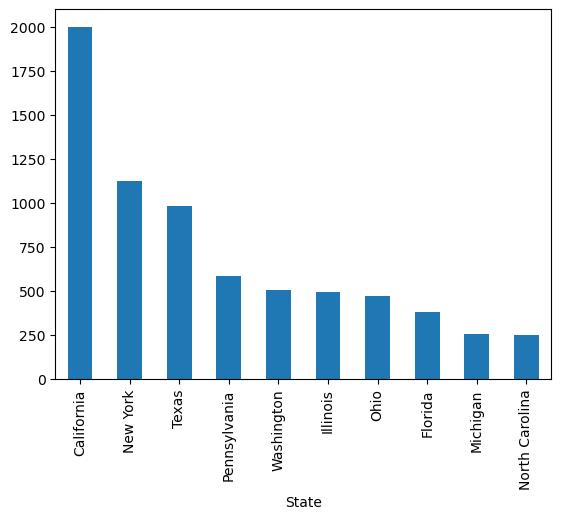

In [63]:
df["State"].value_counts().head(10).plot.bar()

# Summary on sales across state 

-The sales in state California tops  with 2000 sales/state.
-New york standing 2nd with around 1125 sales/state.
-Texas stands 3rd with nearly 1000 sales/state.
-Pennsylvania,Washington,Illinois,Ohio states almost have equal sales of 500 sales/state.
-Florida, Michigan,North Carolina nearly has around 250 sales/state.
-The remaining states records very less sales/state.
"We could do more marketing to attract customers where sales are recorded less,we could provide discounts initially to attract customers to our retail store"

# City

<Axes: xlabel='City'>

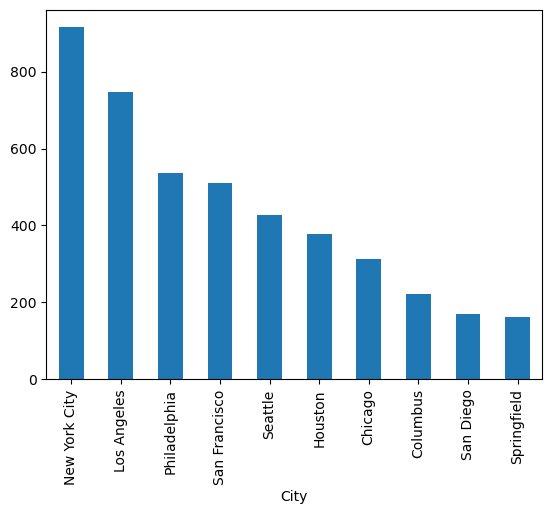

In [64]:
df["City"].value_counts().head(10).plot.bar()

# Summary on sales across city

-New york city nearly has 1000 sales/city.
-Los angeles nearly has 800 sales/city.
-Philadelphia and San Francisco has nearly 550 sales/city.
-Seattle,Houston,Chicago has nearly 400 sales/city.
-The remaining cities have less sales.
-We could use marketing in cities wherever the sales are less,say we will give discounts,offers to attract customers

# Postal code

<Axes: xlabel='Postal Code'>

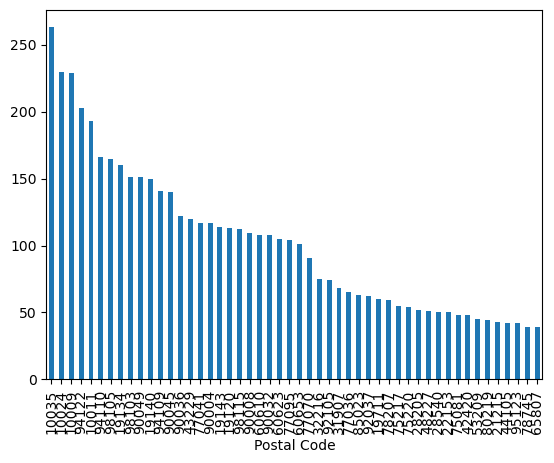

In [65]:
df["Postal Code"].value_counts().head(50).plot.bar()

Distribution of sales according to various postal code of customers are seen
It seems to have a exponential decrease of sales 

# Region

<Axes: xlabel='Region'>

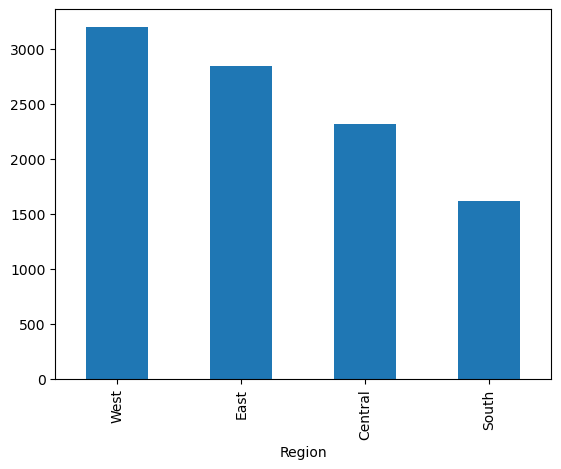

In [66]:
df["Region"].value_counts().head(10).plot.bar()

We can see the West USA has more sales than any other part of USA.
Gradually sales decreasing from West to East,East to Central, and from central to south

# Segment

<Axes: xlabel='Segment'>

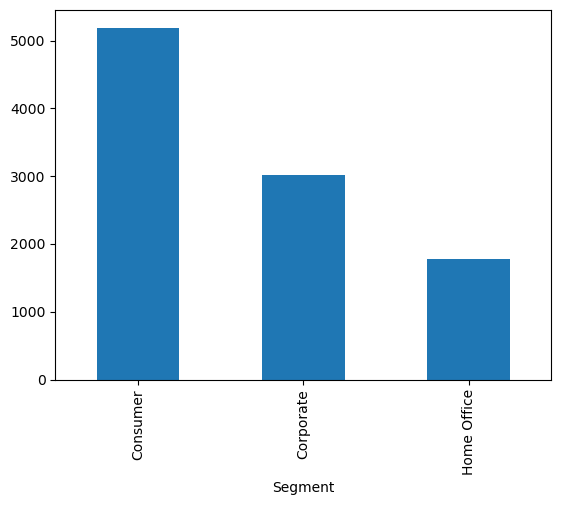

In [67]:
df["Segment"].value_counts().plot.bar()

-We can see that the sales are more under the segment Consumer which has more than 5000sales/segment.
-Corporate has 3000sales/segment.
-And the least being HomeOffice 1500sales/segment
-we can do good marketing on "Home office" segment to increase sales from this segment

# Category

<Axes: xlabel='Category'>

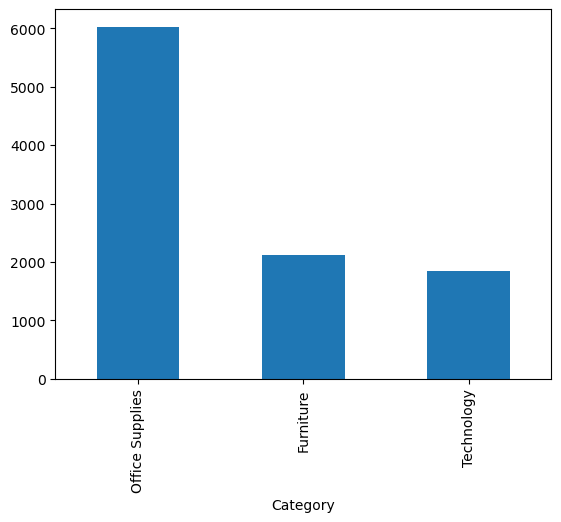

In [68]:
df["Category"].value_counts().head(10).plot.bar()

Office supplies category has got most sales/category.
Furniture and technology has got very less.
we can give some discounts to increase sales/category in other categories also.

# Sub Category

<Axes: xlabel='Sub-Category'>

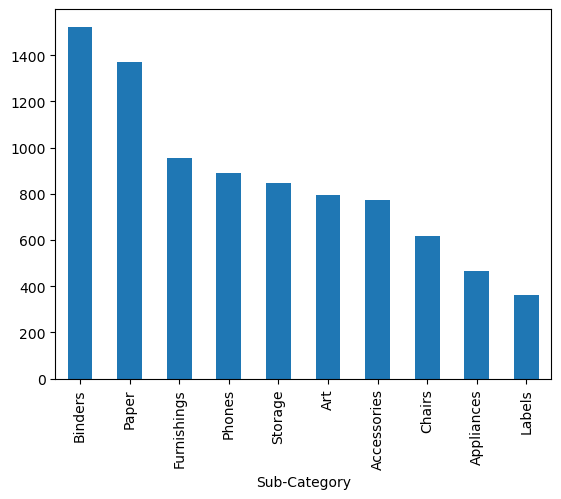

In [69]:
df["Sub-Category"].value_counts().head(10).plot.bar()

-We can see the top10 subcategories sold in a retail store
-Top sales/subcategory is seen in Binders,Paper.
-sales/subcategory is almost same in Furnishings,phones,storage,Art,Accessories
-sales/subcategory is very less in Appliances,Labels,and so on..we can market these and give attractive discounts under these sub-categories

# Ship Mode

<Axes: xlabel='Ship Mode'>

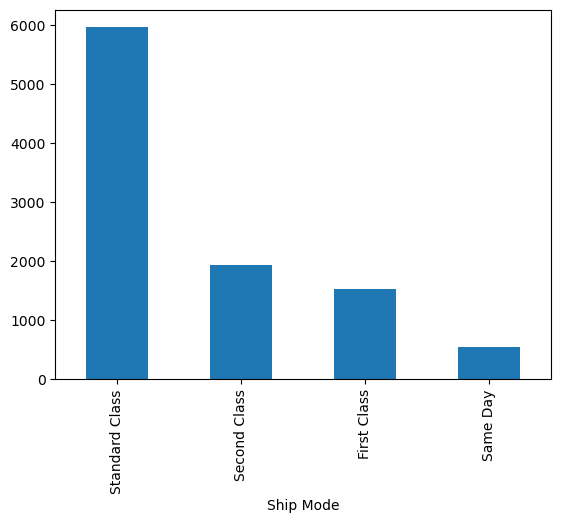

In [70]:
df["Ship Mode"].value_counts().head(10).plot.bar()

The category ship mode where ship mode-"standard class" has more sales 
The category other than "Standard class" have less sales
WE can improve the sales by providing "same day" ship mode, can attract customers who are in a hurry to buy products from a retail store

# ----------End of bar plotting------------

if a categorical column has more unique values,say greater than 20..then it'd be tough to use bar chart, can use line chart to see how the trend goes

# Line chart

In [71]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [72]:
df["City"].value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

# We can plot Line graph for City column as it has 531 catagories of city

# City

<Axes: xlabel='City'>

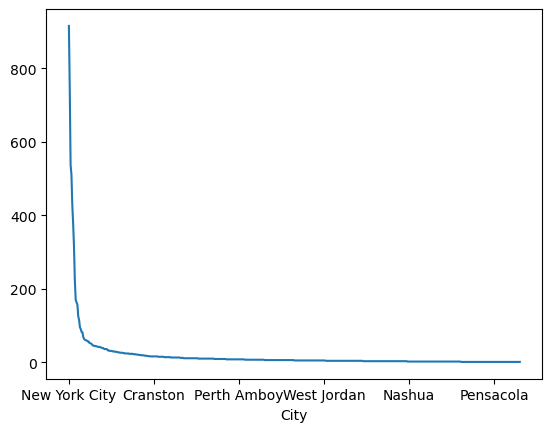

In [73]:
df["City"].value_counts().plot.line()

new york tops the sales/city category and all others nearly zero

# State

In [74]:
df["State"].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

# Add labels for plots

<Axes: xlabel='State'>

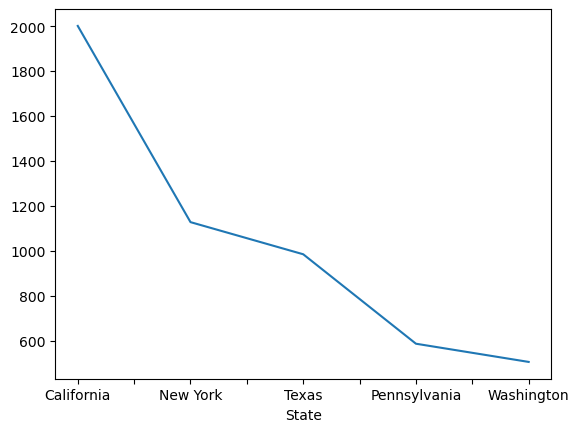

In [75]:
df["State"].value_counts().head().plot.line()

The sales/state is high in California
gradually decreasing from newyork till washington and all other cities
we should try to attract customers in states other than California to increase the profit of retail store

# Region

<Axes: xlabel='Region'>

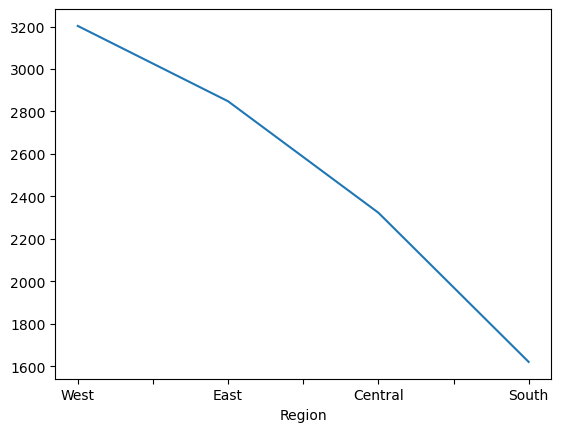

In [76]:
df["Region"].value_counts().plot.line()

The sales trend across different regions of USA is as above

# Category

<Axes: xlabel='Category'>

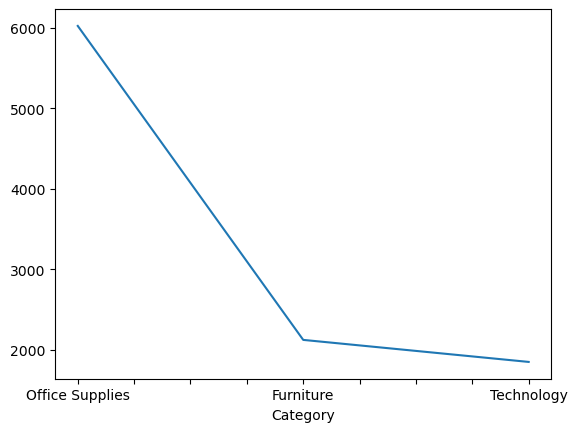

In [77]:
df["Category"].value_counts().plot.line()

Trend in sales of different categories are seen,office supplies dominating

# Sub-Category

Sub-categories trend is seen above,Binders are most sold,followed by furnishings,storage and others decreasing exponentially

<Axes: xlabel='Sub-Category'>

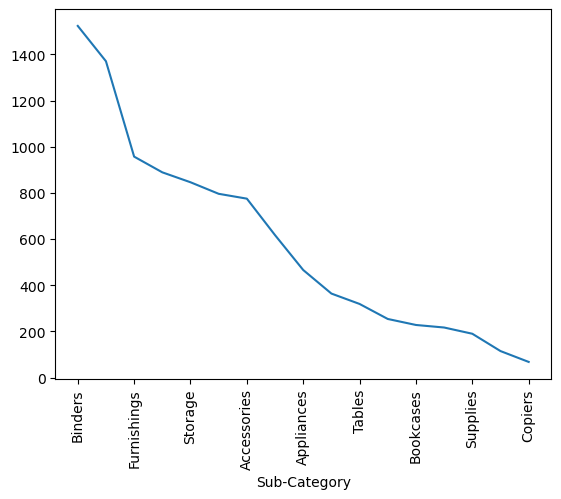

In [78]:
df["Sub-Category"].value_counts().plot.line(rot=90)

# -------------------------end of line graph-----------------------------------

In [79]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Area chart -- nominal categorical

plotting area chart for nominal categorical variable "Postal Code"

<Axes: xlabel='Postal Code'>

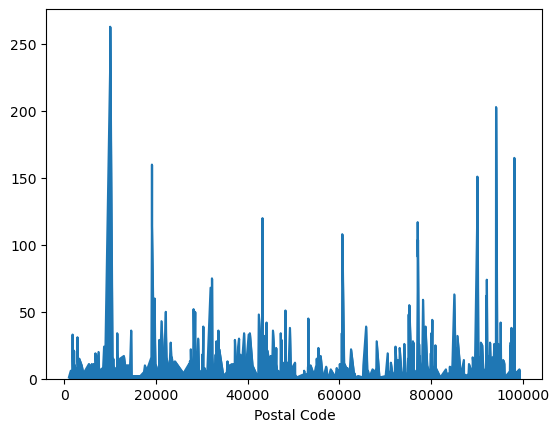

In [80]:
df["Postal Code"].value_counts().sort_index().plot.area()

We can see the areas of postal codes and their corresponding, approximate postal codes.
however, for this dataset We can't conclude much using Area Chart

# -----------------------------------------end of area chart----------------------------------------------

# Histogram- plotted for nominal interval scales

# Sales

Text(0.5, 0, 'Sales')

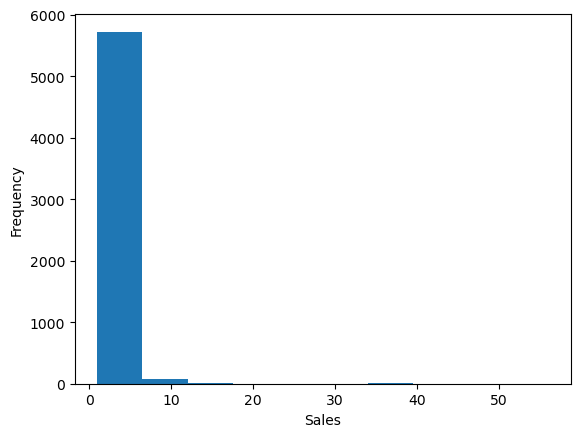

In [81]:
df["Sales"].value_counts().plot.hist()
plt.xlabel('Sales')

We can clearly see that the sales is more in between 0 and 10

# Quantity

Text(0.5, 0, 'Quantity')

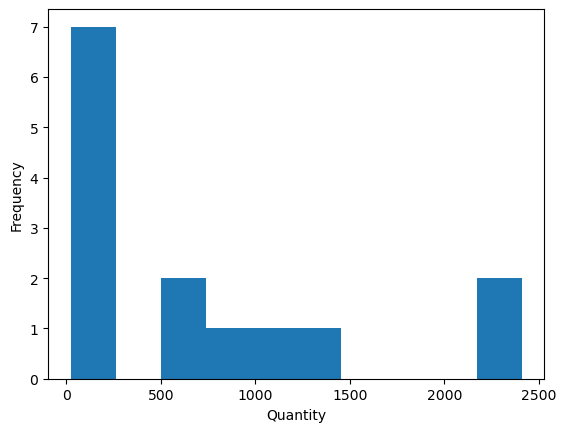

In [82]:
df["Quantity"].value_counts().sort_index().plot.hist()
plt.xlabel('Quantity')

more frequently bought quantities are between '0-200'
less frequently bought quantities are between '500-1500'

# Discount

Text(0.5, 0, 'Discount')

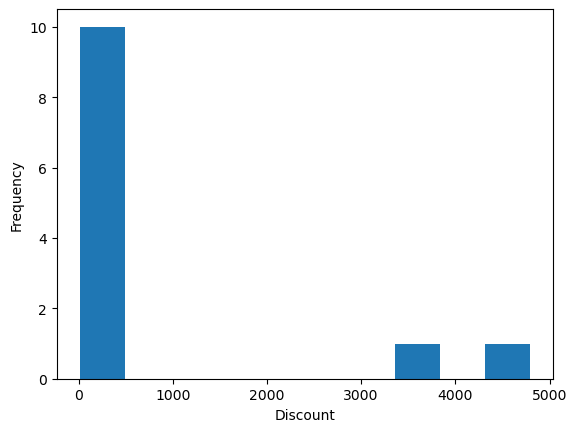

In [83]:
df["Discount"].value_counts().sort_index().plot.hist()
plt.xlabel("Discount")

The discount offered is high in the range of 0 to 500$
and very less frequently the discounts of $3000,$ 4000,And $5000 are obtained by customers 

# Profit

Text(0.5, 0, 'Profit')

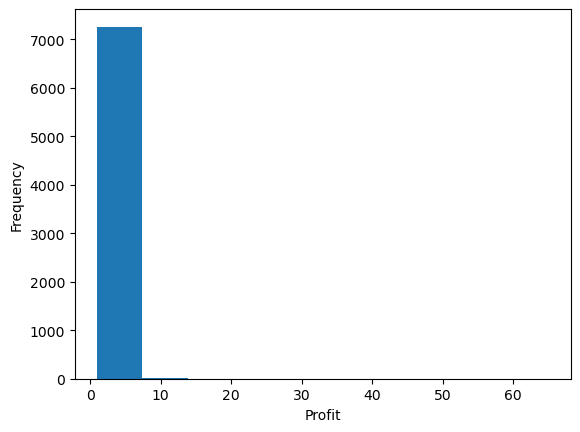

In [84]:
df["Profit"].value_counts().sort_index().plot.hist()
plt.xlabel('Profit')

the profit margin of all products are in the range of '0 - 10'

# ---------------------------end of hishtogram analysis------------------------------------

# Bivariate Analysis

# 1st Scatter plot

In [85]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# sales,discount

<Axes: xlabel='Discount', ylabel='Sales'>

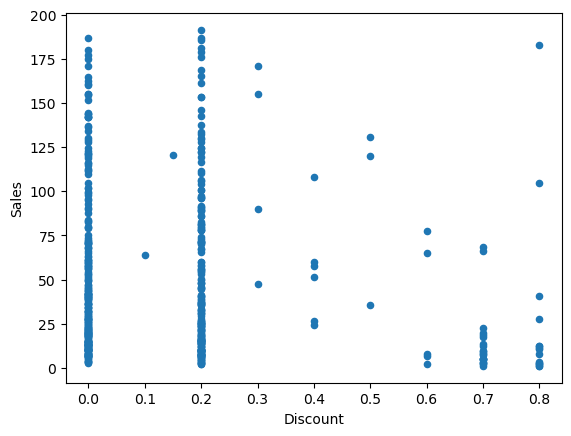

In [86]:
df[df["Sales"]<IQR_sales].sample(500).plot.scatter(y="Sales",x="Discount")

Clearly graph shows non-linearity between sales(dependent variable) and independent variable


# Sales,category

<Axes: xlabel='Category', ylabel='Sales'>

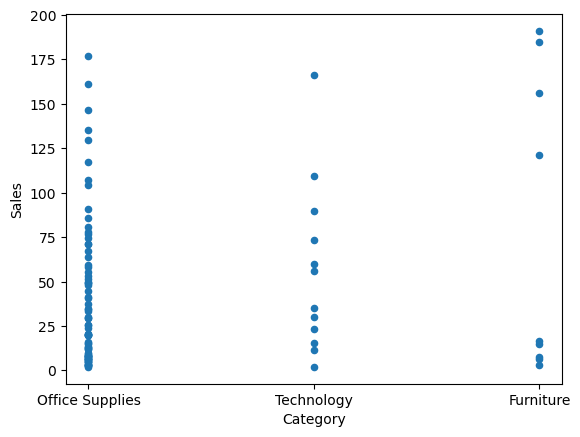

In [87]:
df[df["Sales"]<IQR_sales].sample(100).plot.scatter(y="Sales",x="Category")

# sales,profit-key findings

eliminate negative profits,consider it as loss

<Axes: xlabel='Profit', ylabel='Sales'>

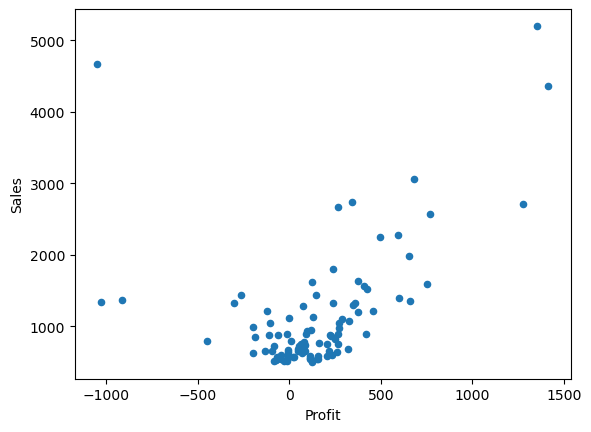

In [88]:
df[df["Sales"]>500].sample(100).plot.scatter(y="Sales",x="Profit")

sales and profit are linearly dependent
as sales(dependent variable) increases profit also increases

# sales,discount(sales-dependent,discount-independent)

<Axes: xlabel='Discount', ylabel='Sales'>

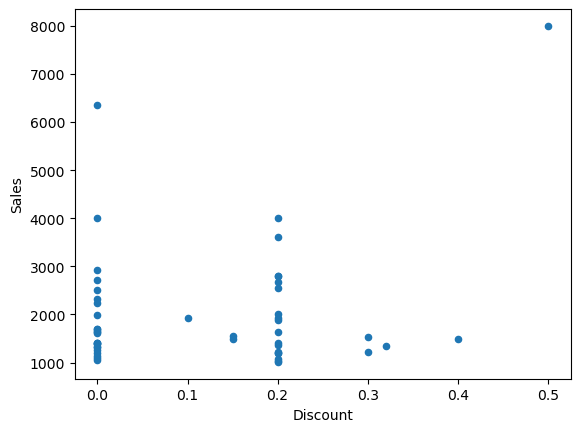

In [94]:
df[df["Sales"]>1000].sample(50).plot.scatter(y="Sales",x="Discount")

no relationship can be seen in above plot

# Plotting using Seaborn

In [95]:
#sns.FacetGrid(df,hue="Sales").map(plt.scatter,"Profit","Category").add_legend();
#plt.show()

C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


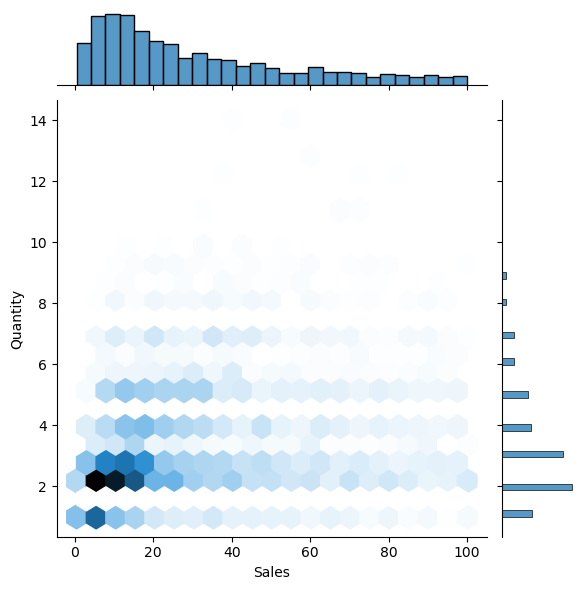

In [98]:
sns.jointplot(x='Sales', y='Quantity', data=df[df['Sales'] < 100], kind='hex', 
              gridsize=20)

 The color of each hexagon represents the number of data points within that bin. 
 A darker color hexbin means that there are more observations, or more density, within that region. 

# Boxplot

C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Region', ylabel='Sales'>

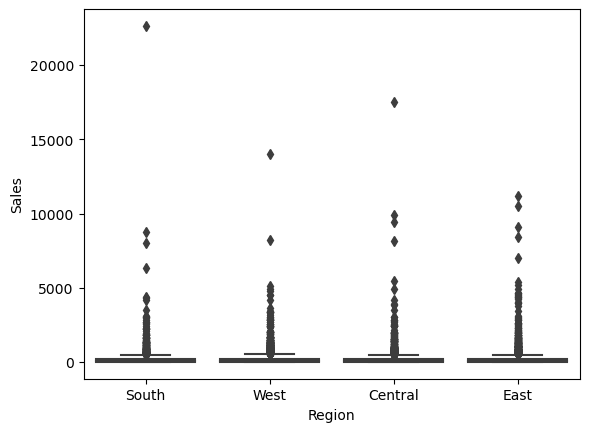

In [103]:
df1 = df[df.Region.isin(df.Sales.value_counts().head(5).index)]

sns.boxplot(x='Region',y='Sales',data=df)

Combined Boxplot of sales in various regions

In [115]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


C:\Users\SHASHIDHAR\AppData\Local\Temp\ipykernel_11888\3137288056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount'])
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Discount', ylabel='Density'>

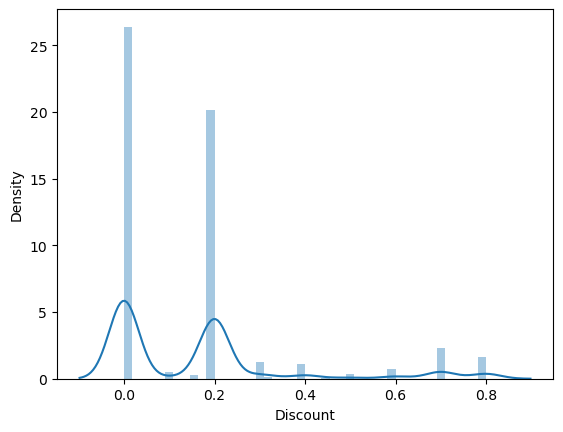

In [114]:
sns.distplot(df['Discount'])

we could see the discounts given more is in the range of 0-20%
and rarely the discounts given are 40%,60%,80%

C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SHASHIDHAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

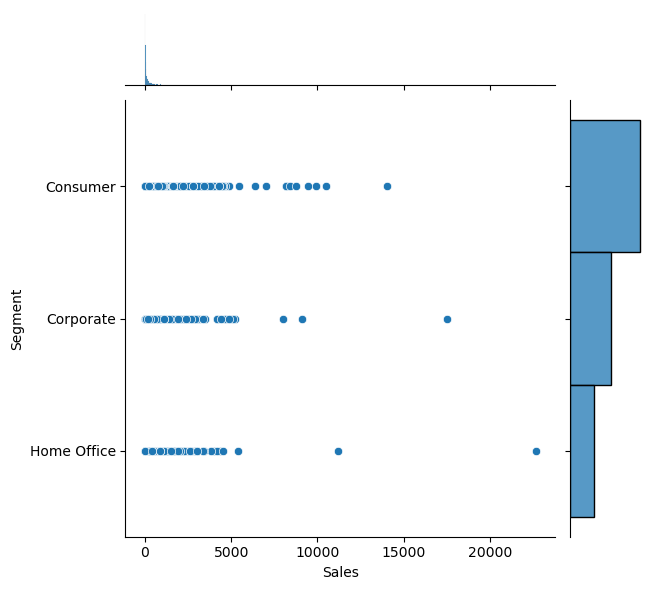

In [120]:
sns.jointplot(x='Sales', y='Segment', data=df)

Consumer segment has more sales,than corporate and Home office

# Multivariate analysis

In [121]:
# Identify numerical and categorical variables
# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=[np.number]).columns
categorical_vars = df.select_dtypes(include=[object]).columns  # Use `object` instead of `np.object`

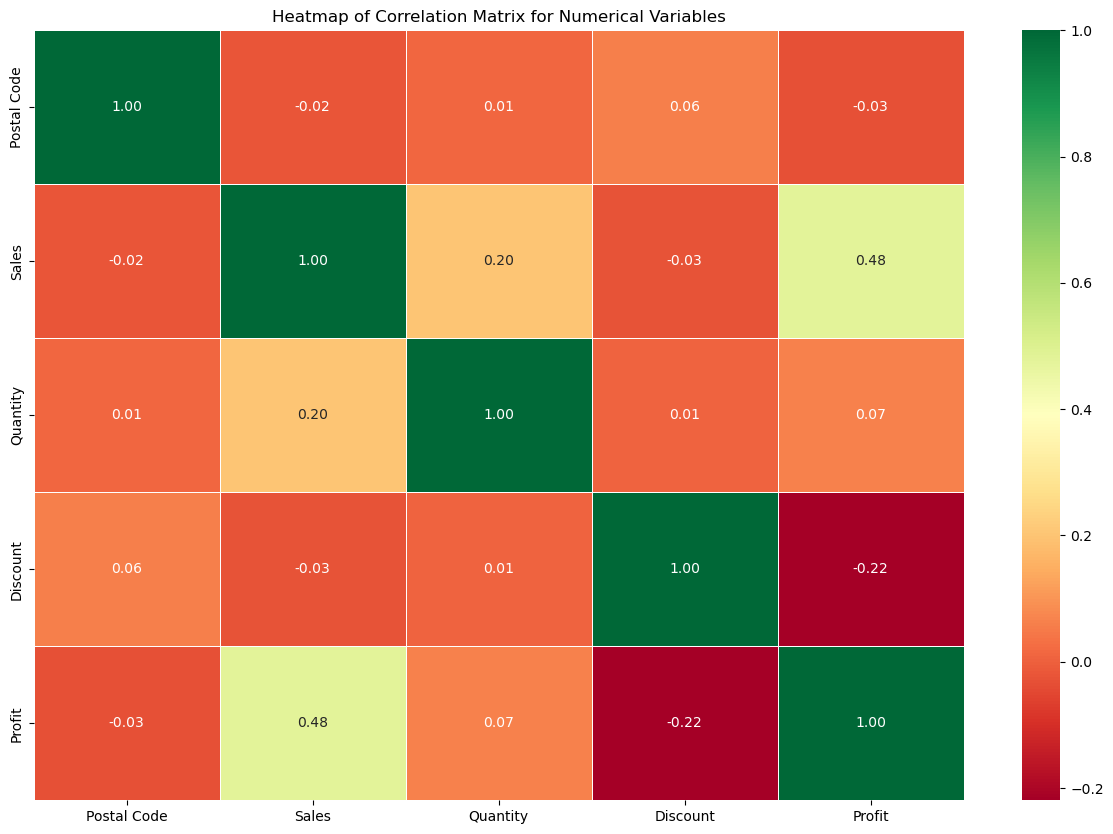

In [124]:
correlation_matrix_numeric = df[numerical_vars].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=.5)
plt.title("Heatmap of Correlation Matrix for Numerical Variables")
plt.show()

Profit and discount is least correlated => less correlated
sales and profit have moderate correlation
quantity and sales are correlated

In [126]:
categorical_vars

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

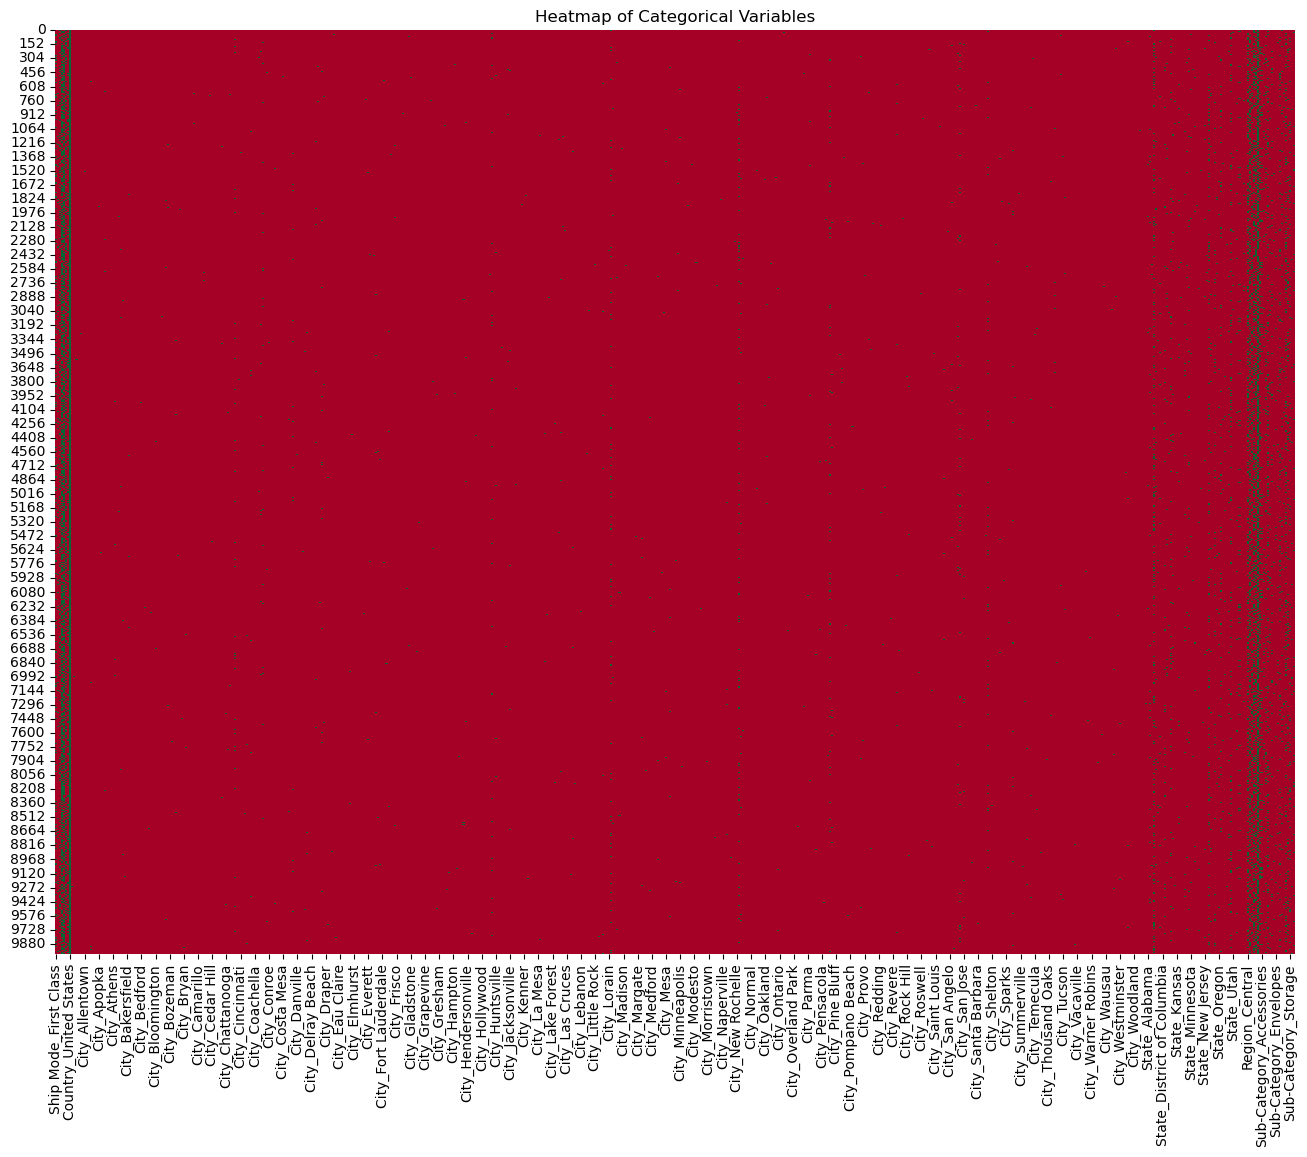

In [125]:
# Create a heatmap for categorical variables
plt.figure(figsize=(16, 12))
sns.heatmap(pd.get_dummies(df[categorical_vars]), cmap="RdYlGn", cbar=False)
plt.title("Heatmap of Categorical Variables")
plt.show()

Most of the categorical data is uncorrelated